In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
import yfinance as yf


Analysis on stock data for BERGEPAINT and BATAINDIA from NSE

In [44]:
tickerSymbol1 = 'BATAINDIA.NS'
tickerSymbol2 = 'BERGEPAINT.NS'

In [45]:
#getting the data
BATAINDIA_daily = yf.Ticker(tickerSymbol1)
BERGEPAINT_daily = yf.Ticker(tickerSymbol2)

Defining the time period for analysis Apr 1 2020 to Mar 31 2022 (2 years)

In [46]:
BATA_df = BATAINDIA_daily.history( period='1d', start = '2020-04-01', end= '2022-03-31')
BERGEPAINT_df = BERGEPAINT_daily.history( period='1d', start = '2020-04-01', end= '2022-03-31')

In [47]:
BATA_df= BATA_df[['Close']]
BATA_df.head()

,Close
Date,
2020-04-01,1142.913818
2020-04-03,1143.922485
2020-04-07,1197.383911
2020-04-08,1191.283813
2020-04-09,1193.589355


In [48]:
BERGEPAINT_df= BERGEPAINT_df[['Close']]
BERGEPAINT_df.head()

,Close
Date,
2020-04-01,479.424316
2020-04-03,444.914062
2020-04-07,475.209717
2020-04-08,459.640411
2020-04-09,470.350464


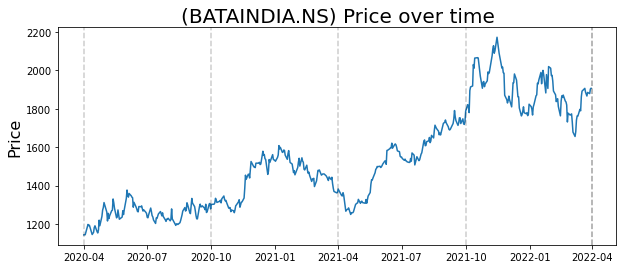

In [49]:
plt.figure(figsize=(10,4))
plt.plot(BATA_df.Close)
plt.title('(%s) Price over time'%tickerSymbol1, fontsize = 20)
plt.ylabel('Price', fontsize = 16)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-01'), color='k', linestyle='--', alpha=0.2)
    plt.axvline(pd.to_datetime(str(year)+'-10-01'), color='k', linestyle='--', alpha =0.2)
    plt.axvline(pd.to_datetime('2022-03-31'), color='k', linestyle='--', alpha =0.2)

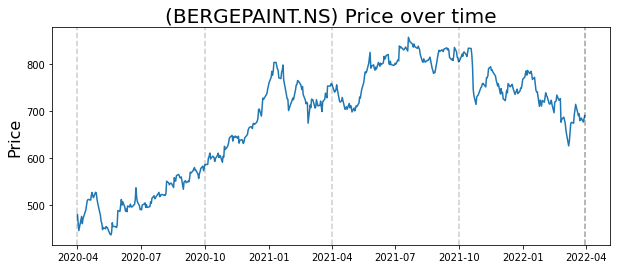

In [50]:
plt.figure(figsize=(10,4))
plt.plot(BERGEPAINT_df.Close)
plt.title('(%s) Price over time'%tickerSymbol2, fontsize = 20)
plt.ylabel('Price', fontsize = 16)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-01'), color='k', linestyle='--', alpha=0.2)
    plt.axvline(pd.to_datetime(str(year)+'-10-01'), color='k', linestyle='--', alpha =0.2)
    plt.axvline(pd.to_datetime('2022-03-31'), color='k', linestyle='--', alpha =0.2)

As both the time series data don't seem to be stationary, we take the first diefference to establish stationarity and see if the data becomes stationary for analysis.

In [51]:
#taking the first difference for both the stock
bataindia_diff1 = BATA_df.Close.values[1:]-BATA_df.Close.values[:-1]
bergepaint_diff1 = BERGEPAINT_df.Close.values[1:]-BERGEPAINT_df.Close.values[:-1]
bataindia_diff1= np.concatenate([bataindia_diff1,[0]])
bergepaint_diff1 = np.concatenate([bergepaint_diff1,[0]])

In [52]:
BATA_df['FirstDifference'] = bataindia_diff1
BERGEPAINT_df['FirstDifference']= bergepaint_diff1

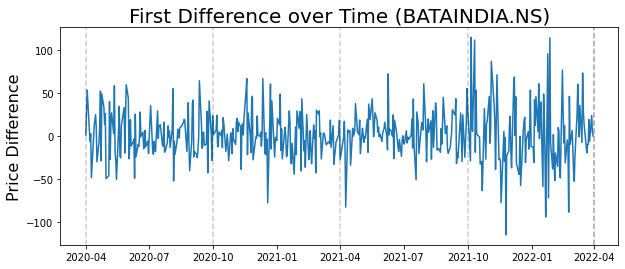

In [53]:
plt.figure(figsize=(10,4))
plt.plot(BATA_df.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol1, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-01'), color='k', linestyle='--', alpha=0.2)
    plt.axvline(pd.to_datetime(str(year)+'-10-01'), color='k', linestyle='--', alpha =0.2)
    plt.axvline(pd.to_datetime('2022-03-31'), color='k', linestyle='--', alpha =0.2)

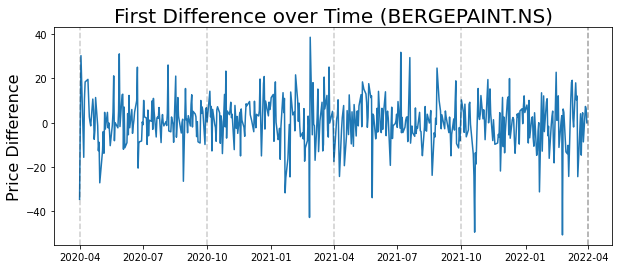

In [54]:
plt.figure(figsize=(10,4))
plt.plot(BERGEPAINT_df.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol2, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-01'), color='k', linestyle='--', alpha=0.2)
    plt.axvline(pd.to_datetime(str(year)+'-10-01'), color='k', linestyle='--', alpha =0.2)
    plt.axvline(pd.to_datetime('2022-03-31'), color='k', linestyle='--', alpha =0.2)

The data seems to be stationary for BERGEPAINT and periods of volatility in later part of 2022 for BATAINDIA

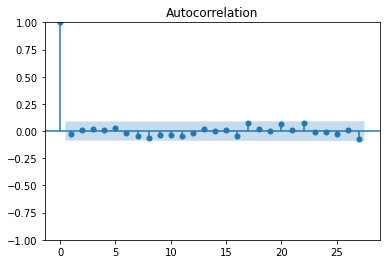

In [55]:
acf_plot_bataindia = plot_acf(BATA_df.FirstDifference)

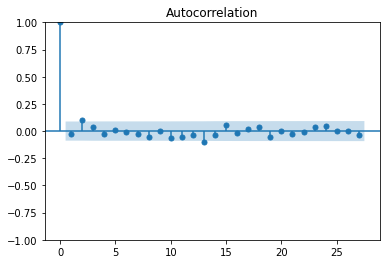

In [56]:
acf_plot_bergepaint = plot_acf(BERGEPAINT_df.FirstDifference)

# acf for both the securities doesn't provide much info

C:\Users\satwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


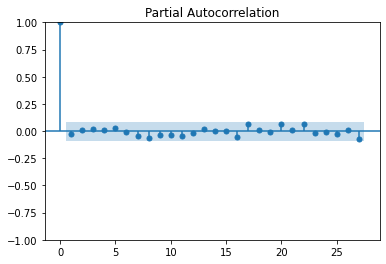

In [57]:
# looking at the pacf plot
pacf_plot_bataindia = plot_pacf(BATA_df['FirstDifference'])

C:\Users\satwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


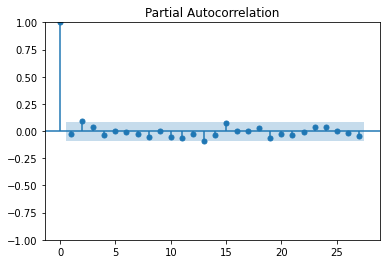

In [58]:
pacf_plot_bergepaint = plot_pacf(BERGEPAINT_df['FirstDifference'])

# No strong trend in any lags for the PACF as well